In [1]:
import sys
import xarray as xr
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import glob
%matplotlib inline
%autosave 60

Autosaving every 60 seconds


In [3]:
sys.path.insert(0,'/home/albert/lib/python/AJ-spectre/')
from netCDF4 import Dataset
import PowerSpec as ps
from nachos12_10_by_10_boxes import boxes

In [4]:
import plot_box as pb


/home/albert/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:1685: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


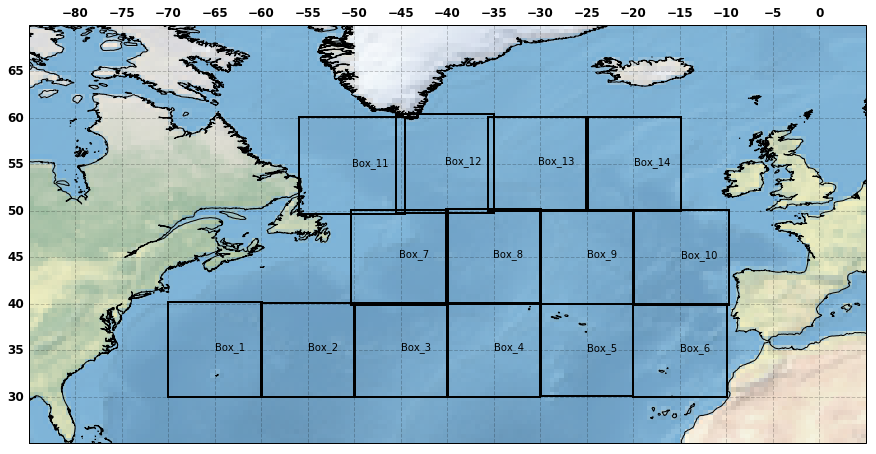

In [5]:
pb.plot_boxes(boxes,textbox=None,title=None)

In [24]:
fileu = sorted(glob.glob("/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-MAA13-S/u_v_1d/NACHOS12.L75-MAA13_y2012m??.1d_gridUsurf.nc"))
filev = sorted(glob.glob("/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-MAA13-S/u_v_1d/NACHOS12.L75-MAA13_y2012m??.1d_gridVsurf.nc"))


In [31]:
param='Vspec'

In [32]:
if param == 'Uspec':
    varname = 'vozocrtx'
    filenames = fileu
elif param == 'Vspec':
    varname = 'vomecrty'
    filenames = filev
elif param == 'ssh':
    varname = 'sossheig'
    filenames = filessh
elif param == 'curl':
    varname = 'socurloverf'
    filenames = filecurl


In [33]:
# - folder to save file
WaveSpecResult = '/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-MAA13-S/u_v_1d/' + param + '/'

In [34]:
YrMth  = ['2012_01','2012_02','2012_03','2012_04','2012_05','2012_06','2012_07','2012_08','2012_09','2012_10','2012_11','2012_12']

In [35]:
##########################################
def get_values_in_box(box,data):
    jmin,jmax = box.jmin,box.jmax
    imin,imax = box.imin,box.imax
    values = data[:,0,jmin:jmax+1,imin:imax+1]
    values = ma.masked_invalid(values)
    return values

##########################################
def compute_spec_in_boxes(boxes,data,Mth):
    for box in boxes:
        #print('processing box ' +  box.name)
        compute_spec_for_box(box,data,Mth)

##########################################
def compute_spec_for_box(box,data,Mth):
    var = get_values_in_box(box,data)
    kspec,pspec = compute_spec(var,box.navlon,box.navlat)
    np.savez(WaveSpecResult+'WaveSpec_'+box.name+'_'+param+'_'+Mth, kspec=kspec ,pspec=pspec)

##########################################
def compute_spec(data,navlon,navlat):
    days = len(data)
    mth_pspec = []
    for it in np.arange(0,days):
        arr = data[it]
        x_reg,y_reg,data_reg = ps.interpolate(arr,navlon,navlat,interp='basemap')
        data_reg = ps.isdata_contain_nan(data_reg)
        kspec,pspec = ps.get_spectrum(data_reg,x_reg,y_reg,window='tukey',detrend='both')
        mth_pspec.append(pspec)
    mthly_pspec = np.array(mth_pspec)
    mean_mthly_pspec = mthly_pspec.mean(axis=0)
    return kspec,mean_mthly_pspec




In [36]:
############### MAIN CALL ###########################
ii= 0
for filename in filenames:
    print(filename)
    ncfile = Dataset(filename,'r')
    data = ncfile.variables[varname]
    Mth = YrMth[ii]
    compute_spec_in_boxes(boxes,data,Mth)
    ii=ii + 1

/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-MAA13-S/u_v_1d/NACHOS12.L75-MAA13_y2012m01.1d_gridVsurf.nc
/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-MAA13-S/u_v_1d/NACHOS12.L75-MAA13_y2012m02.1d_gridVsurf.nc
/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-MAA13-S/u_v_1d/NACHOS12.L75-MAA13_y2012m03.1d_gridVsurf.nc
/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-MAA13-S/u_v_1d/NACHOS12.L75-MAA13_y2012m04.1d_gridVsurf.nc
/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-MAA13-S/u_v_1d/NACHOS12.L75-MAA13_y2012m05.1d_gridVsurf.nc
/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-MAA13-S/u_v_1d/NACHOS12.L75-MAA13_y2012m06.1d_gridVsurf.nc
/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-MAA13-S/u_v_1d/NACHOS12.L75-MAA13_y2012m07.1d_gridVsurf.nc
/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-MAA13-S/u_v_1d/NACHOS12.L75-MAA13_y2012m08.1d_gridVsurf.nc
/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-MAA13-S/u_v_1d/NACHOS12.L75-MAA13_y2012m09.1d_gridVsurf.nc
/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-MAA13-S/u_v_1d/NACHOS12.L75-M